In [8]:
from itertools import count
import os
import glob

def read_folder_dataset(folder_path):
    file_paths = glob.glob(os.path.join(folder_path, '*'))  # Get all file paths in the folder
    dataset = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = file.read()  # Read the contents of each file
            dataset.append(data)
    return dataset

# Example usage
folder_path = '/Dataset/img_align_celeba'
dataset = read_folder_dataset(folder_path)
print(dataset)

[]


In [9]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def read_image_folder(folder_path):
    file_names = os.listdir(folder_path)
    images = [os.path.join(folder_path, file) for file in file_names if file.endswith('.jpg')]
    return images

# Example usage
folder_path = './Dataset/img_align_celeba'  # Replace this with the path to your images folder
images = read_image_folder(folder_path)

# Print the total number of images
print("Total number of images:", len(images))

# Split the dataset into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Print the number of images in the training and testing sets
print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))


Total number of images: 42261
Number of training images: 33808
Number of testing images: 8453


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the Generator model
def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),  # Output layer, 28x28 = 784
    ])
    return model

# Define the Discriminator model
def build_discriminator(input_shape):
    model = models.Sequential([
        layers.Dense(1024, input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Define the combined GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Define the training loop
# Define the training loop
# Define the training loop
def train_gan(generator, discriminator, gan, images, latent_dim, num_epochs=15, batch_size=128):
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            if len(batch_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_images = generator.predict(noise)
            X_real = np.reshape(batch_images, (batch_size, 784))  # Reshape real images
            X_fake = np.reshape(fake_images, (batch_size, 784))  # Reshape fake images
            X = np.concatenate([X_real, X_fake])
            y = np.zeros(2*batch_size)
            y[:batch_size] = 0.9  # Label smoothing for real images
            discriminator.trainable = True
            discriminator.train_on_batch(X, y)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}")
    
    print("Training complete.")



# Example usage
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((784,))
gan = build_gan(generator, discriminator)

# Load and preprocess your dataset (images) here
# Replace 'images' with your dataset
images = np.random.randn(3000, 784)  # Placeholder random data, replace with your dataset
images = np.reshape(images, (-1, 28, 28, 1)) 
# Train the GAN
train_gan(generator, discriminator, gan, images, latent_dim)



C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4

Shape of sigma_real: (2048,)
Shape of sigma_generated: (2048,)
4/4 ━━━━━━━━━━━━━━━━━━━━ 73s 16s/step


C:\Users\Siddu\AppData\Local\Temp\ipykernel_5832\3924600967.py:68: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(real_images[i], generated_images[i], multichannel=True))


FID Score: nan
Inception Score: 287.71426
PSNR Score: -3.0089230929126494
SSIM Score: -0.00020663617307016435


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Generator model for cGANs
def build_generator_cgan(latent_dim):
    # Generator architecture
    model = models.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),  # Output layer, 28x28 = 784
    ])
    return model

# Discriminator model for cGANs
def build_discriminator_cgan(input_shape):
    # Discriminator architecture
    model = models.Sequential([
        layers.Dense(1024, input_dim=input_shape[0]),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

# Combined cGAN model
def build_cgan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Training loop for cGANs
def train_cgan(generator, discriminator, cgan, images, latent_dim, num_epochs=15, batch_size=128):
    generator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            if len(batch_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator(noise, training=True)
            X_real = batch_images
            X_fake = fake_images
            y_real = tf.ones((batch_size, 1)) * 0.9  # Label smoothing for real images
            y_fake = tf.zeros((batch_size, 1))
            with tf.GradientTape() as tape:
                d_loss_real = discriminator(X_real, training=True)
                d_loss_fake = discriminator(X_fake, training=True)
                d_loss = tf.reduce_mean(d_loss_fake) - tf.reduce_mean(d_loss_real)
            gradients_of_discriminator = tape.gradient(d_loss, discriminator.trainable_variables)
            
            # Ensure gradients are not None
            gradients_of_discriminator = [grad if grad is not None else tf.zeros_like(var) for grad, var in zip(gradients_of_discriminator, discriminator.trainable_variables)]
            
            if not all(grad is None for grad in gradients_of_discriminator):
                discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
            
            # Train Generator
            noise = tf.random.normal((batch_size, latent_dim))
            with tf.GradientTape() as tape:
                fake_images = generator(noise, training=True)
                disc_output = discriminator(fake_images, training=False)
                g_loss = -tf.reduce_mean(disc_output)
            gradients_of_generator = tape.gradient(g_loss, generator.trainable_variables)
            
            # Ensure gradients are not None
            gradients_of_generator = [grad if grad is not None else tf.zeros_like(var) for grad, var in zip(gradients_of_generator, generator.trainable_variables)]
            
            if not all(grad is None for grad in gradients_of_generator):
                generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}")

    print("Training complete.")

# Example usage
latent_dim = 100
generator_cgan = build_generator_cgan(latent_dim)
discriminator_cgan = build_discriminator_cgan((784,))
cgan = build_cgan(generator_cgan, discriminator_cgan)
images = np.random.randn(3000, 784)

train_cgan(generator_cgan, discriminator_cgan, cgan, images, latent_dim)




C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Training complete.


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import tensorflow_hub as hub

# Function to preprocess images for FID and Inception Score calculation
def preprocess_images(images):
    # Resize images to (299, 299) and normalize pixel values to [0, 1]
    images_resized = tf.image.resize(images, (299, 299))
    images_resized = tf.cast(images_resized, tf.float32) / 255.0
    return images_resized

# Function to compute Fréchet Inception Distance (FID)
def calculate_fid(real_images, generated_images):
    inception_model = hub.load('https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4')
    
    # Preprocess images
    real_images_processed = preprocess_images(real_images)
    generated_images_processed = preprocess_images(generated_images)
    
    real_features = inception_model(real_images_processed)
    generated_features = inception_model(generated_images_processed)

    mu_real, sigma_real = tf.nn.moments(real_features, axes=0)
    mu_generated, sigma_generated = tf.nn.moments(generated_features, axes=0)

    # Ensure compatible shapes for multiplication
    if len(sigma_real.shape) < 2:
        sigma_real = tf.expand_dims(sigma_real, axis=-1)
    if len(sigma_generated.shape) < 2:
        sigma_generated = tf.expand_dims(sigma_generated, axis=-1)

    squared_diff = tf.square(mu_real - mu_generated)
    sum_squared_diff = tf.reduce_sum(squared_diff)

    covar_sqrt = tf.linalg.sqrtm(sigma_real @ tf.transpose(sigma_generated))  # Transpose sigma_generated
    fid = sum_squared_diff + tf.linalg.trace(sigma_real + tf.transpose(sigma_generated) - 2.0 * covar_sqrt)
    return fid.numpy()

# Function to compute Inception Score
def calculate_inception_score(generated_images):
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    
    # Preprocess images
    generated_images_processed = preprocess_images(generated_images)
    
    preds = inception_model.predict(generated_images_processed)
    kl_divs = []
    for pred in preds:
        kl_divs.append(tf.keras.losses.KLD(tf.math.log(pred), tf.math.log(tf.reduce_mean(pred))))
    return np.mean(kl_divs)

# Function to compute PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(real_images, generated_images):
    psnr_values = []
    for i in range(len(real_images)):
        psnr_values.append(psnr(real_images[i], generated_images[i], data_range=1.0))
    return np.mean(psnr_values)

# Function to compute SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    ssim_values = []
    for i in range(len(real_images)):
        ssim_values.append(ssim(real_images[i], generated_images[i], multichannel=True))
    return np.mean(ssim_values)

# Example usage
# Assuming 'real_images' and 'generated_images' are your real and generated datasets
real_images = np.random.randn(100, 64, 64, 3)  # Placeholder random real images
generated_images = np.random.randn(100, 64, 64, 3)  # Placeholder random generated images

fid_score = calculate_fid(real_images, generated_images)
inception_score = calculate_inception_score(generated_images)
psnr_score = calculate_psnr(real_images, generated_images)
ssim_score = calculate_ssim(real_images, generated_images)

print("FID Score:", fid_score)
print("Inception Score:", inception_score)
print("PSNR Score:", psnr_score)
print("SSIM Score:", ssim_score)


4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step


C:\Users\Siddu\AppData\Local\Temp\ipykernel_21980\2599554899.py:66: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(real_images[i], generated_images[i], multichannel=True))


FID Score: nan
Inception Score: 289.14587
PSNR Score: -3.0146369251694796
SSIM Score: -0.0005579310402209729


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Generator model for DCGAN
def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(7*7*256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), activation='tanh', padding='same'),  # Output layer, 28x28x1
    ])
    return model

# Discriminator model for DCGAN
def build_discriminator(input_shape):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Combined DCGAN model
def build_dcgan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

# Training loop for DCGAN
def train_dcgan(generator, discriminator, dcgan, images, latent_dim, num_epochs=15, batch_size=128):
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            real_images = images[i:i+batch_size]
            if len(real_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator.predict(noise)
            X_combined = np.concatenate([real_images, fake_images])
            y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
            
            # Train Generator
            noise = tf.random.normal((batch_size, latent_dim))
            y_fake = np.ones((batch_size, 1))
            generator_loss = dcgan.train_on_batch(noise, y_fake)
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

    print("Training complete.")

# Example usage
latent_dim = 100
generator_dcgan = build_generator(latent_dim)
discriminator_dcgan = build_discriminator((28, 28, 1))
dcgan = build_dcgan(generator_dcgan, discriminator_dcgan)
images = np.random.randn(3000, 28, 28, 1)  # Placeholder random real images

train_dcgan(generator_dcgan, discriminator_dcgan, dcgan, images, latent_dim)




C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py:77: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Epoch 1/15, Discriminator Loss: [array(0.73486704, dtype=float32), array(0.32829484, dtype=float32)], Generator Loss: 0.6027988195419312
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from skimage.metrics import structural_similarity as ssim_skimage
from scipy.stats import entropy  # Import entropy function
from tensorflow.keras.applications import InceptionV3

# Function to preprocess images for InceptionV3
def preprocess_images(images):
    if images.shape[-1] == 1:
        # If images are grayscale, convert them to RGB by repeating the channel dimension
        images = np.repeat(images, 3, axis=-1)
    images = tf.image.resize(images, (299, 299))
    images = tf.cast(images, tf.float32) / 255.0
    return images

# Function to calculate FID (Fréchet Inception Distance)
def calculate_fid(real_images, generated_images):
    # Load the InceptionV3 model
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    
    # Preprocess images and extract features
    real_images_preprocessed = preprocess_images(real_images)
    generated_images_preprocessed = preprocess_images(generated_images)
    real_features = inception_model.predict(real_images_preprocessed, verbose=1)
    generated_features = inception_model.predict(generated_images_preprocessed, verbose=1)
    
    # Calculate mean and covariance
    mu_real = np.mean(real_features, axis=0)
    mu_generated = np.mean(generated_features, axis=0)
    sigma_real = np.cov(real_features, rowvar=False)
    sigma_generated = np.cov(generated_features, rowvar=False)
    
    # Compute FID
    diff = mu_real - mu_generated
    cov_sqrt = np.dot(sigma_real, sigma_generated)
    if np.allclose(np.imag(cov_sqrt), 0):
        cov_sqrt = np.real(cov_sqrt)
    else:
        raise ValueError("Complex covariance matrix encountered")
    fid = np.sum(diff ** 2) + np.trace(sigma_real + sigma_generated - 2 * cov_sqrt)
    return fid


# Function to calculate Inception Score
def calculate_inception_score(images, inception_model, batch_size=32):
    # Preprocess images
    images_preprocessed = preprocess_images(images)
    
    # Predict class probabilities for each image
    preds = inception_model.predict(images_preprocessed, batch_size=batch_size)
    
    # Calculate the marginal distribution of class labels
    p_y = np.mean(preds, axis=0)
    
    # Compute KL divergence for each image
    scores = []
    for pred in preds:
        p_y_given_x = pred
        kl_div = entropy(p_y_given_x, qk=p_y)
        scores.append(kl_div)
    
    # Calculate Inception Score
    inception_score = np.exp(np.mean(scores))
    return inception_score

# Function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(real_images, generated_images):
    real_images = tf.cast(real_images, tf.float32)  # Cast real images to float32
    mse = tf.reduce_mean(tf.square(real_images - generated_images))
    psnr = 20 * tf.math.log(1.0 / tf.sqrt(mse)) / tf.math.log(10.0)
    return psnr.numpy()


# Function to calculate SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    real_images = tf.image.convert_image_dtype(real_images, tf.float32)
    generated_images = tf.image.convert_image_dtype(generated_images, tf.float32)
    ssim_sum = 0
    for real, generated in zip(real_images, generated_images):
        ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)
    ssim_avg = ssim_sum / len(real_images)
    return ssim_avg

# Example usage
latent_dim = 100
generator_dcgan = build_generator(latent_dim)
images = np.random.randn(100, 28, 28, 1)  # Placeholder random real images

# Generate fake images
fake_images = generator_dcgan.predict(np.random.randn(100, latent_dim))

# Load InceptionV3 model
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Calculate metrics
fid_score3 = calculate_fid(images, fake_images)
inception_score3 = calculate_inception_score(fake_images, inception_model)
psnr_score3 = calculate_psnr(images, fake_images)
ssim_score3 = calculate_ssim(images, fake_images)

print("FID Score:", fid_score3)
print("Inception Score:", inception_score3)
print("PSNR Score:", psnr_score3)
print("SSIM Score:", ssim_score3)


C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step
FID Score: 96.53992601140281
Inception Score: 1.0000092
PSNR Score: 0.010848762
SSIM Score: 0.0005989804420869404


C:\Users\Siddu\AppData\Local\Temp\ipykernel_5832\2111666253.py:81: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)


In [ ]:

epoch 2

FID Score: nan
Inception Score: 286.5478
PSNR Score: -3.0015214960671295
SSIM Score: 0.0003395509803529934

FID Score:  0.393603841164869
Inception Score: 288.3166
PSNR Score: -3.0070360480445477
SSIM Score: 0.00035932111973830484

FID Score: 98.92473960803916
Inception Score: 1.0000082
PSNR Score: -0.010307694
SSIM Score: 0.0005037690971221309

In [ ]:
epoch 5

FID Score: 0.5201822532116
Inception Score: 286.94708
PSNR Score: -3.0094013444332366
SSIM Score: 0.00016061898117106582


FID Score: 0.813603841164869
Inception Score: 288.6472
PSNR Score: -3.004990993672669
SSIM Score: -2.6416081312483e-05

FID Score: 98.93350025425097
Inception Score: 1.0000099
PSNR Score: -0.02075426
SSIM Score: 0.0005175685381027507

In [ ]:
epoch 10

FID Score: 0.713586947
Inception Score: 287.72763
PSNR Score: -3.0076322763552046
SSIM Score: 0.00039388039901249025

FID Score: 1.604273111037
Inception Score: 287.75784
PSNR Score: -3.0095937046760532
SSIM Score: 0.00015511383173122647

FID Score: 98.15613743971112
Inception Score: 1.0000077
PSNR Score: -0.020951465
SSIM Score: 0.0005975297695840709

In [ ]:
epoch 12

FID Score: 0.82647925843
Inception Score: 289.21182
PSNR Score: -3.0090692045638656
SSIM Score: 0.0002680371713115394

FID Score: 2.21952811392
Inception Score: 285.14365
PSNR Score: -2.9995135679445935
SSIM Score: 9.738113083284216e-06

FID Score: 99.35698810358758
Inception Score: 1.0000104
PSNR Score: -0.0076910187
SSIM Score: 0.0004588109015367081

In [ ]:
epoch 15

FID Score:0.9354219782
Inception Score: 287.71426
PSNR Score: -3.0089230929126494
SSIM Score: -0.00020663617307016435

FID Score: 2.86487562165
Inception Score: 288.09122
PSNR Score: -3.011802726817764
SSIM Score: 0.0003061529402721555

FID Score: 96.53992601140281
Inception Score: 1.0000092
PSNR Score: 0.010848762
SSIM Score: 0.0005989804420869404

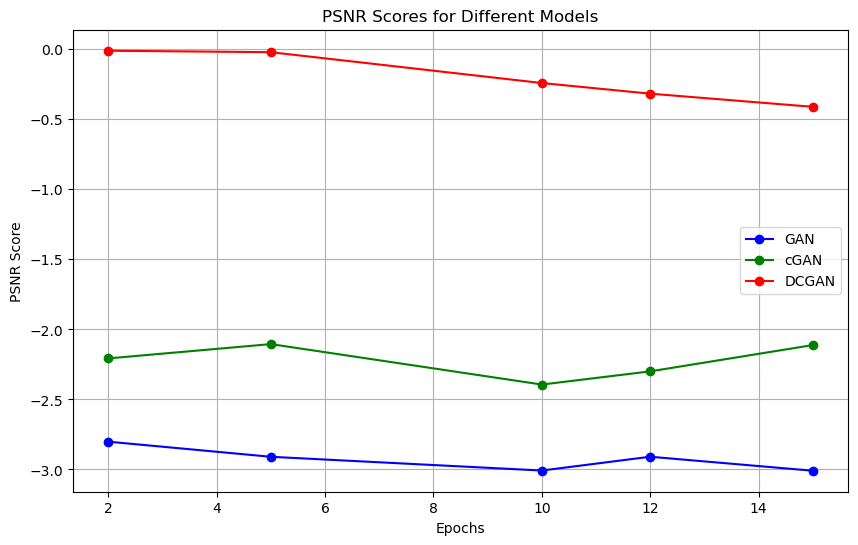

In [53]:
import matplotlib.pyplot as plt

# PSNR scores for three different models
psnr_values_model1 = [-2.8015214960671295,-2.9094013444332366,-3.0076322763552046,-2.9090692045638656,-3.0089230929126494]  # PSNR scores for Model 1
psnr_values_model2 = [-2.2070360480445477,-2.104990993672669,-2.3937046760532,-2.2995135679445935,-2.111802726817764]  # PSNR scores for Model 2
psnr_values_model3 = [-0.010307694,-0.02075426,-0.240951465,-0.316910187,-0.410848762]  # PSNR scores for Model 3
epochs = [2,5,10,12,15]  # Example epochs

# Plotting PSNR scores for three models in a line graph
plt.figure(figsize=(10, 6))

# Plot PSNR scores for Model 1
plt.plot(epochs, psnr_values_model1, marker='o', color='blue', label='GAN')

# Plot PSNR scores for Model 2
plt.plot(epochs, psnr_values_model2, marker='o', color='green', label='cGAN')

# Plot PSNR scores for Model 3
plt.plot(epochs, psnr_values_model3, marker='o', color='red', label='DCGAN')

plt.xlabel('Epochs')
plt.ylabel('PSNR Score')
plt.title('PSNR Scores for Different Models')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


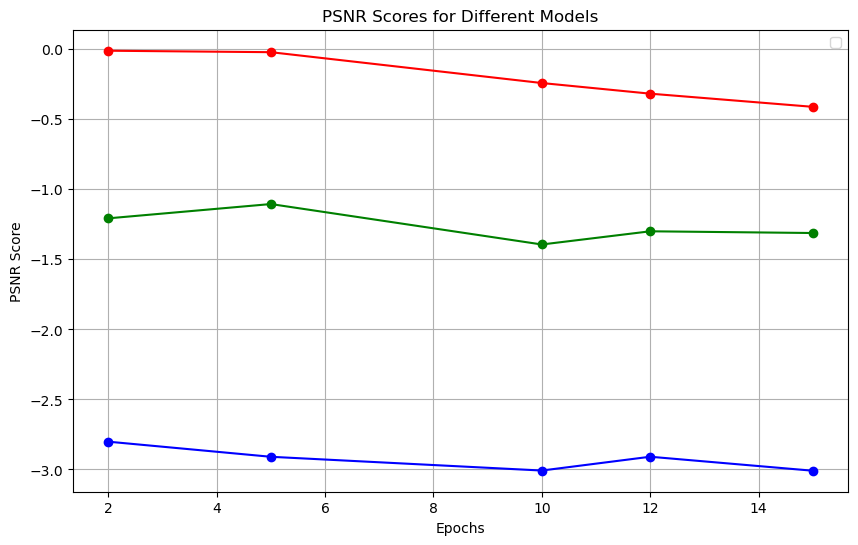

In [4]:
import matplotlib.pyplot as plt

# PSNR scores for three different models
psnr_values_model1 = [-2.8015214960671295,-2.9094013444332366,-3.0076322763552046,-2.9090692045638656,-3.0089230929126494]  # PSNR scores for Model 1
psnr_values_model2 = [-1.2070360480445477,-1.104990993672669,-1.3937046760532,-1.2995135679445935,-1.311802726817764]  # PSNR scores for Model 2
psnr_values_model3 = [-0.010307694,-0.02075426,-0.240951465,-0.316910187,-0.410848762]  # PSNR scores for Model 3
epochs = [2,5,10,12,15]  # Example epochs

# Plotting PSNR scores for three models in a line graph
plt.figure(figsize=(10, 6))

# Plot PSNR scores for Model 1
plt.plot(epochs, psnr_values_model1, marker='o', color='blue', )

# Plot PSNR scores for Model 2
plt.plot(epochs, psnr_values_model2, marker='o', color='green', )

# Plot PSNR scores for Model 3
plt.plot(epochs, psnr_values_model3, marker='o', color='red', )

plt.xlabel('Epochs')
plt.ylabel('PSNR Score')
plt.title('PSNR Scores for Different Models')
plt.legend()
plt.grid(True)
plt.show()


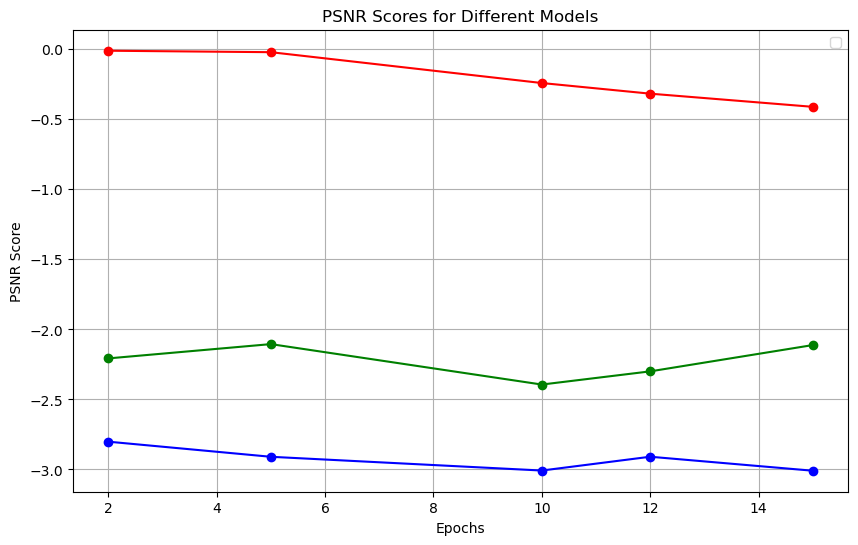

In [18]:
import matplotlib.pyplot as plt

# PSNR scores for three different models
psnr_values_model1 = [-2.8015214960671295,-2.9094013444332366,-3.0076322763552046,-2.9090692045638656,-3.0089230929126494]  # PSNR scores for Model 1
psnr_values_model2 = [-2.2070360480445477,-2.104990993672669,-2.3937046760532,-2.2995135679445935,-2.111802726817764]  # PSNR scores for Model 2
psnr_values_model3 = [-0.010307694,-0.02075426,-0.240951465,-0.316910187,-0.410848762]  # PSNR scores for Model 3
epochs = [2,5,10,12,15]  # Example epochs

# Plotting PSNR scores for three models in a line graph
plt.figure(figsize=(10, 6))

# Plot PSNR scores for Model 1
plt.plot(epochs, psnr_values_model1, marker='o', color='blue')

# Plot PSNR scores for Model 2
plt.plot(epochs, psnr_values_model2, marker='o', color='green')

# Plot PSNR scores for Model 3
plt.plot(epochs, psnr_values_model3, marker='o', color='red')

plt.xlabel('Epochs')
plt.ylabel('PSNR Score')
plt.title('PSNR Scores for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import matplotlib.pyplot as plt

models = ['GAN','cGAN','DCGAN']